In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os

In [16]:
training_fruit_img = []
training_label = []
for dir_path in glob.glob("/Users/piyushmetkar/Documents/SMU/Notes/Spring 18/7324 Machine Learning in Python/Lab 6/fruits-360/Training/*"):
    img_label = dir_path.split("/")[-1]
# for dir_path in glob.glob(r'D:\Downloads\Notes\CSE_7324_ML\fruits-360_dataset_2018_02_08\Training\*'):
#     img_label = dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        image = cv2.imread(image_path,cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        training_fruit_img.append(image)
        training_label.append(img_label)
training_fruit_img = np.array(training_fruit_img)
training_label = np.array(training_label)

In [17]:
label_to_id = {v:k for k,v in enumerate(np.unique(training_label)) }
id_to_label = {v:k for k,v in label_to_id.items() }

In [18]:
id_to_label

{0: 'Apple Braeburn',
 1: 'Apple Golden 1',
 2: 'Apple Golden 2',
 3: 'Apple Golden 3',
 4: 'Apple Granny Smith',
 5: 'Apple Red 1',
 6: 'Apple Red 2',
 7: 'Apple Red 3',
 8: 'Apple Red Delicious',
 9: 'Apple Red Yellow',
 10: 'Apricot',
 11: 'Avocado',
 12: 'Avocado ripe',
 13: 'Banana',
 14: 'Banana Red',
 15: 'Cactus fruit',
 16: 'Carambula',
 17: 'Cherry',
 18: 'Clementine',
 19: 'Cocos',
 20: 'Dates',
 21: 'Granadilla',
 22: 'Grape Pink',
 23: 'Grape White',
 24: 'Grape White 2',
 25: 'Grapefruit Pink',
 26: 'Grapefruit White',
 27: 'Guava',
 28: 'Huckleberry',
 29: 'Kaki',
 30: 'Kiwi',
 31: 'Kumquats',
 32: 'Lemon',
 33: 'Lemon Meyer',
 34: 'Limes',
 35: 'Litchi',
 36: 'Mandarine',
 37: 'Mango',
 38: 'Maracuja',
 39: 'Nectarine',
 40: 'Orange',
 41: 'Papaya',
 42: 'Passion Fruit',
 43: 'Peach',
 44: 'Peach Flat',
 45: 'Pear',
 46: 'Pear Abate',
 47: 'Pear Monster',
 48: 'Pear Williams',
 49: 'Pepino',
 50: 'Pineapple',
 51: 'Pitahaya Red',
 52: 'Plum',
 53: 'Pomegranate',
 54: 'Q

In [19]:
training_label_id = np.array([label_to_id[i] for i in training_label])

In [20]:
training_label_id

array([ 8,  8,  8, ..., 44, 44, 44])

In [21]:
training_fruit_img.shape,training_label_id.shape

((28736, 100, 100, 3), (28736,))

In [23]:
validation_fruit_image=[]
validation_label =[]
for dir_path in glob.glob("/Users/piyushmetkar/Documents/SMU/Notes/Spring 18/7324 Machine Learning in Python/Lab 6/fruits-360/Validation/*"):
    img_label = dir_path.split("/")[-1]
# for dir_path in glob.glob(r'D:\Downloads\Notes\CSE_7324_ML\fruits-360_dataset_2018_02_08\Validation\*'):
#     img_label = dir_path.split("\\")[-1]

    for img_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        image = cv2.imread(image_path,cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_fruit_image.append(image)
        validation_label.append(img_label)
validation_fruit_img = np.array(validation_fruit_image)
validation_label = np.array(validation_label)

In [24]:
validation_label_id = np.array([label_to_id[i] for i in validation_label])

In [25]:
validation_fruit_img.shape,validation_label_id.shape

((9673, 100, 100, 3), (9673,))

In [26]:
X_train,X_test = training_fruit_img,validation_fruit_img
Y_train,Y_test =training_label_id,validation_label_id
#mean(X) = np.mean(X_trai
X_train = X_train/255
X_test = X_test/255

X_flat_train = X_train.reshape(X_train.shape[0],100*100*3)
X_flat_test = X_test.reshape(X_test.shape[0],100*100*3)

#One Hot Encode the Output
Y_train = keras.utils.to_categorical(Y_train, 60)
Y_test = keras.utils.to_categorical(Y_test, 60)

print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (28736, 100, 100, 3) (9673, 100, 100, 3) (28736, 60) (9673, 60)
Flattened: (28736, 30000) (9673, 30000)


(100, 100, 3)


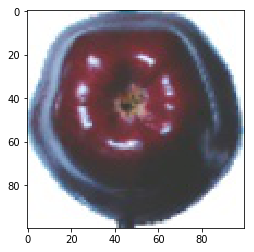

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
print(X_train[0].shape)
plt.imshow(X_train[0])
plt.show()
print(Y_train[0])


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Activation,BatchNormalization
from keras.optimizers import Adamax
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=(100,100,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4,4)))

"""
model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
"""

model.add(Flatten())
model.add(Dense(256,activation='elu'))
#model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))
model.add(Dense(60))
model.add(Activation("softmax"))

model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer = Adamax(),
             metrics=['accuracy'])

model.fit(X_train,
          Y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data = (X_test,Y_test)
         )

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])